### Import dependencies

In [1]:
from IPython.display import display_html, display
from PIL import Image as PILImage
from io import BytesIO

from img2table.document.pdf import PDF
from img2table.ocr import TesseractOCR

In [2]:
pdf_path = "data/tables.pdf"

### Instantiate objects

In [3]:
# Definition of OCR instance, requires prior installation of Tesseract-OCR
ocr = TesseractOCR()

# Definition of PDF from path
# The optional pages argument enables the extraction of table on specific pages of the PDF
pdf_from_path = PDF(src=pdf_path, ocr=ocr, pages=[0, 1])

# Definition of PDF from bytes
with open(pdf_path, 'rb') as f:
    pdf_bytes = f.read()
pdf_from_bytes = PDF(src=pdf_bytes, ocr=ocr)

# Definition of PDF from file-like object
pdf_from_file_like = PDF(src=BytesIO(pdf_bytes), ocr=ocr)

### PDF used for the example

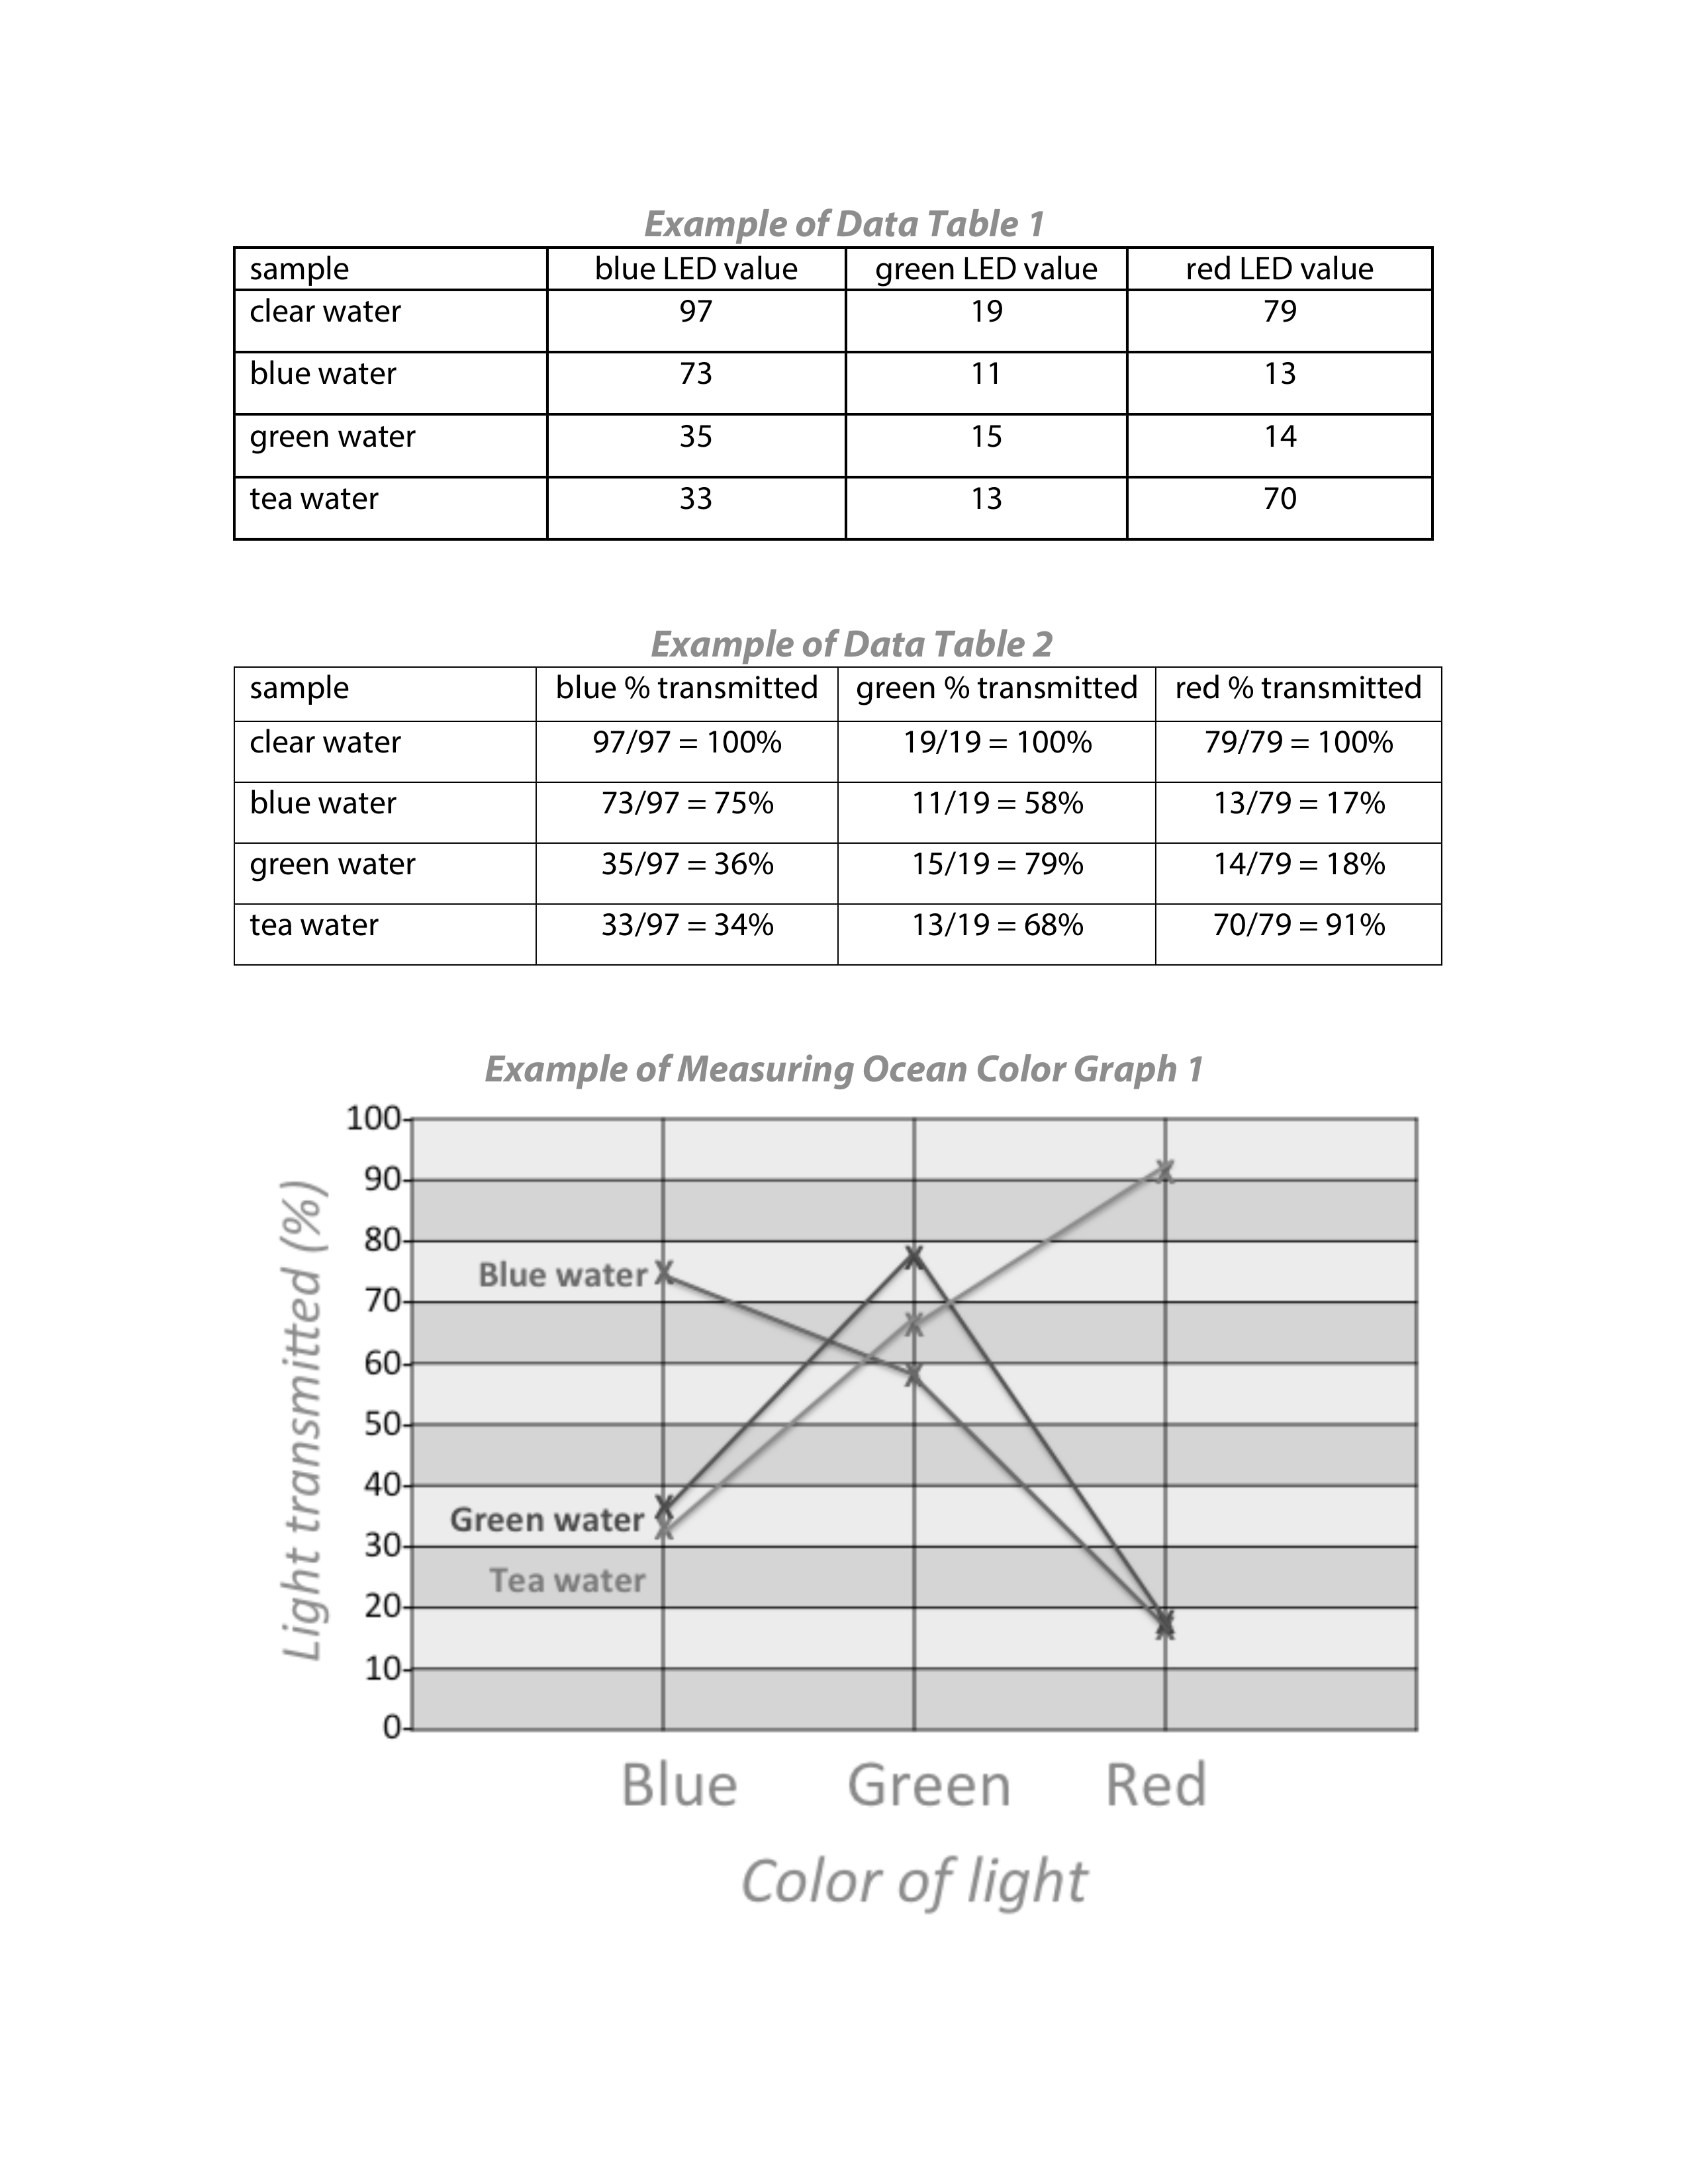

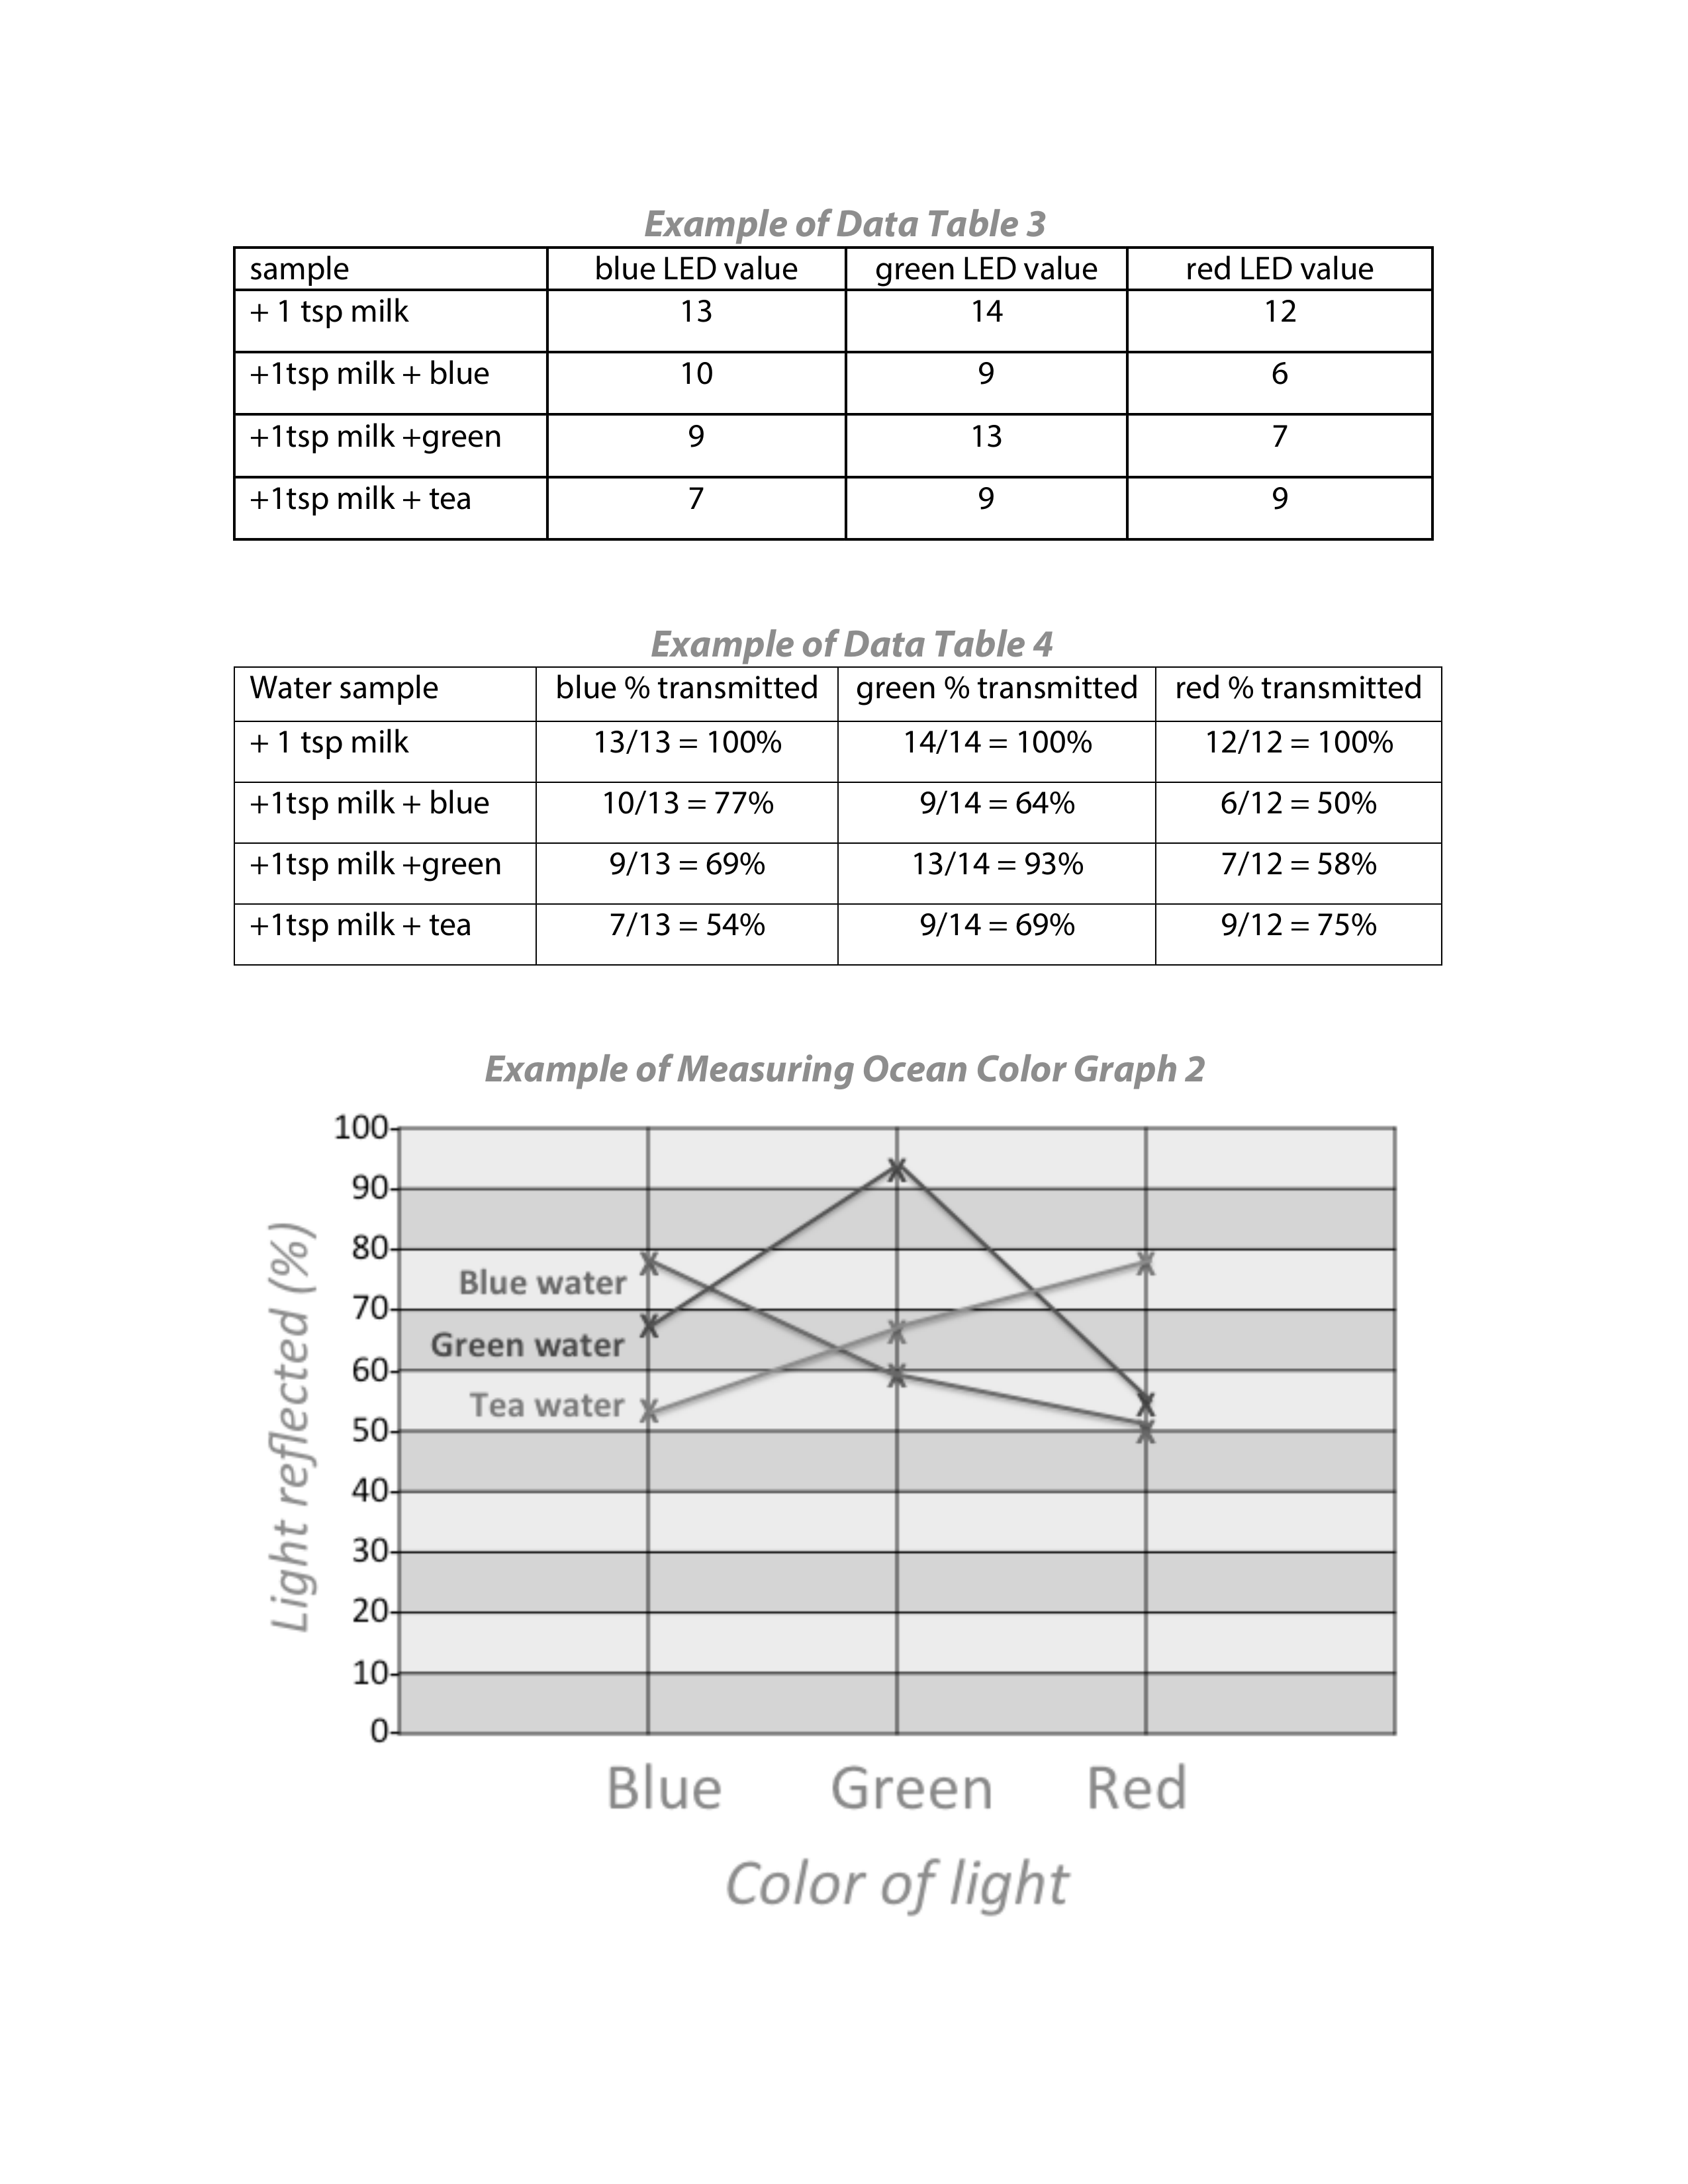

In [4]:
for img in pdf_from_path.images:
    display(PILImage.fromarray(img))

### Extract tables

In [5]:
# Extract tables
extracted_tables = pdf_from_path.extract_tables()

In [6]:
for page, tables in extracted_tables.items():
    for idx, table in enumerate(tables):
        display_html(table.html_repr(title=f"Page {page + 1} - Extracted table n°{idx + 1}"), raw=True)

,0,1,2,3
0,sample,blue LED value,green LED value,red LED value
1,clear water,97,19,79
2,blue water,73,11,13
3,green water,35,15,14
4,tea water,33,13,70


,0,1,2,3
0,sample,blue % transmitted,green % transmitted,red % transmitted
1,clear water,97/97 = 100%,19/19 = 100%,79/79 = 100%
2,blue water,73/97 = 75%,11/19 = 58%,13/79 = 17%
3,green water,35/97 = 36%,15/19 = 79%,14/79 = 18%
4,tea water,33/97 = 34%,13/19 = 68%,70/79 = 91%


,0,1,2,3
0,sample,blue LED value,green LED value,red LED value
1,+ 1 tsp milk,13,14,12
2,+1tsp milk + blue,10,9,6
3,+1tsp milk +green,9,13,7
4,+1tsp milk + tea,7,9,9


,0,1,2,3
0,Water sample,blue % transmitted,green % transmitted,red % transmitted
1,+ 1 tsp milk,13/13 = 100%,14/14 = 100%,12/12 = 100%
2,+1tsp milk + blue,10/13 = 77%,9/14 = 64%,6/12 = 50%
3,+1tsp milk +green,9/13 = 69%,13/14 = 93%,7/12 = 58%
4,+1tsp milk + tea,7/13 = 54%,9/14 = 69%,9/12 = 75%
